In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('Downloads/StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 1. Find out how many males and females participated in the test

In [3]:
print("Number_of_female=",list(data["gender"]).count('female'))
print("NUmber_of_male=",list(data['gender']).count('male'))

Number_of_female= 518
NUmber_of_male= 482


# 2. Student's parental level of education

<AxesSubplot:xlabel='parental level of education', ylabel='count'>

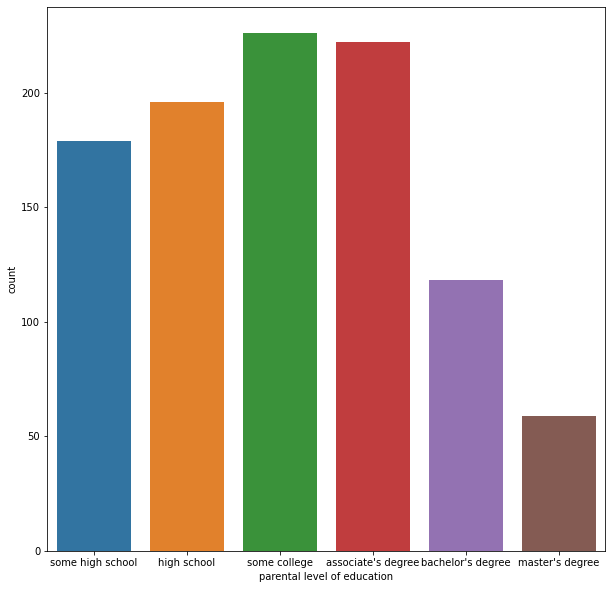

In [4]:
plt.figure(figsize=(10,10))
sns.countplot(x ='parental level of education', data = data)

* college level of education has highest value and master's degree has smallest 

# 3. Who scores the most on average for math, reading and writing based on

# ● Gender

In [5]:
data.groupby("gender")[["math score",'reading score','writing score']].mean().reset_index()

,gender,math score,reading score,writing score
0,female,63.376448,72.590734,72.467181
1,male,68.821577,65.545643,63.446058


* male scored the most on average for math based on gender

* female scored most on average for reading based on gender

* female scored the most on average for writing based on gender

# ● Test preparation course

In [6]:
data.groupby("test preparation course")[["math score","reading score","writing score"]].mean().reset_index()

,test preparation course,math score,reading score,writing score
0,completed,69.96648,74.175978,74.684358
1,none,63.78972,66.417445,64.457944


* test preparation course completed students scored the most for math, writing and reading

# 4. What do you think about the scoring variation for math, reading and writing based on

# ● Gender

In [7]:
data.groupby("gender")[["math score","reading score","writing score"]].std().reset_index()

,gender,math score,reading score,writing score
0,female,16.029928,14.411018,14.844842
1,male,14.556411,14.149594,14.227225


* Male students are more consistant scoring in math,reading and writing because they have less std deviation in math score ,reading score and writing score

# ● Test preparation course

In [8]:
data.groupby('test preparation course')[['math score','reading score','writing score']].std().reset_index()

,test preparation course,math score,reading score,writing score
0,completed,14.521847,13.537572,13.236412
1,none,15.705689,14.608896,15.041667


* Students who completed test preparation course are more consistant scoring in math, reading, adn writing because they have less std deviation in math score, reading score and writing score

# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this

In [9]:
math_score=data['math score']
math_score.describe()

count    1000.000000
mean       66.001000
std        15.569567
min         0.000000
25%        57.000000
50%        66.000000
75%        77.000000
max       100.000000
Name: math score, dtype: float64

* Top 25% of students cut off mark is 77.00

In [10]:
Total_number =  math_score[math_score>=77]
Total_number.count()

255

* Final 255 students are eligible for bonus point

In [12]:
eligible_students=math_score.tail(255)
eligible_students

745     68
746     68
747     68
748     68
749     69
      ... 
995     99
996    100
997    100
998    100
999    100
Name: math score, Length: 255, dtype: int64